<a href="https://colab.research.google.com/github/EdWangLoDaSc/Dropout-as-a-Grid-Search_Representing-Model-Uncertainty-in-Deep-Learning/blob/main/%E6%B5%85%E5%B1%82ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is necessary to use tensorflow 1.14.0 under the environment of Colab.

In [ ]:
pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 51 kB/s 
     |████████████████████████████████| 3.1 MB 34.8 MB/s 
     |████████████████████████████████| 488 kB 59.0 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently ta

In [ ]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [ ]:
import pandas as pd
import numpy as np
## TensorFlow
import tensorflow as tf
#tf.compat.v1.reset_default_graph()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
df = pd.read_csv('/content/content/MyDrive/2048_final.csv')


In [ ]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
df = pd.read_csv('/content/content/MyDrive/CGAN_Regression/CGAN_code/Datasets/Datasets.csv')
df = df.drop(['Calculated-pChEMBL'], axis = 1).values

In [ ]:
2048-384-384-384

896

In [ ]:
num_inputs = 2048

## Encoder section
hidden_1 = 1664     ## 256 (Number of nodes)
hidden_2 = 1280  ## 128
hidden_3 = 896  ## 64

## Latent Space
hidden_4 = 512  ## 32

## Decoder 
hidden_5 = hidden_3      ## 64
hidden_6 = hidden_2      ## 128
hidden_7 = hidden_1      ## 256

num_outputs = num_inputs ## 512

In [ ]:
## Hyper Parameters: 

learning_rate = 0.001

## Activation function

"""
Here we are using Rectified Linear Unit( ReLu). It is at the left for the user to test and experiment 
with other activation functions and learning rate
"""

activ_fn = tf.nn.relu

## Input Layer

"""
Defining Input data
"""

X = tf.compat.v1.placeholder(tf.float32,shape = [None,num_inputs])

## scaling keras.initializers.
#initializer = tf.keras.initializers.variance_scaling_initializer()
initializer = tf.contrib.layers.variance_scaling_initializer()

In [ ]:
## Weights(Parameters)
"""
Here we are randomly initializing the weights which are later updated based on the gradient descent and learning rate 
such that it minimizes the cost function
"""

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.transpose(w4)
w6 = tf.transpose(w3)
w7 = tf.transpose(w2)
w8 = tf.transpose(w1)

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = b3
b6 = b2
b7 = b1
b8 = tf.Variable(tf.zeros(num_outputs))

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
output_layer = activ_fn(tf.matmul(hid_layer7,w8)+b8)

In [ ]:
## Loss Function(Cost function)

"""
Here we are defining the cost function, Minimizing loss between input and output layers
"""

loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.AdamOptimizer(learning_rate)

## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

ValueError: ignored

In [12]:
## Training the model

"""
Epoch: Number of training steps/iterations
Batch Size: Number of obseravtions that are used during each iterations to update weights. 
"""
num_epochs =300
batch_size = 8

to_plot_220 = []
from sklearn.utils import shuffle
#df = shuffle(df) 


with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./content/MyDrive/checkpoint_dir/my_model.meta')
    saver.restore(sess, tf.train.latest_checkpoint('/content/content/MyDrive/checkpoint_dir'))# 加载变量值
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, lsd1.shape[0], batch_size)):
            xs = lsd1[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_220.append(training_loss)
        print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./checkpoint_/my_model')

Epoch: 0 Loss: 0.0348101407289505
Epoch: 1 Loss: 0.025294966995716095
Epoch: 2 Loss: 0.019386904314160347
Epoch: 3 Loss: 0.015595512464642525
Epoch: 4 Loss: 0.012776345014572144
Epoch: 5 Loss: 0.010544106364250183
Epoch: 6 Loss: 0.008895527571439743
Epoch: 7 Loss: 0.007548058405518532
Epoch: 8 Loss: 0.006376582197844982
Epoch: 9 Loss: 0.005406704731285572
Epoch: 10 Loss: 0.00449917558580637
Epoch: 11 Loss: 0.0037445935886353254
Epoch: 12 Loss: 0.0031029880046844482
Epoch: 13 Loss: 0.0025870301760733128
Epoch: 14 Loss: 0.002132870489731431
Epoch: 15 Loss: 0.0017832103185355663
Epoch: 16 Loss: 0.0015067054191604257
Epoch: 17 Loss: 0.0012712394818663597
Epoch: 18 Loss: 0.0010943023953586817
Epoch: 19 Loss: 0.0009575627045705914
Epoch: 20 Loss: 0.000828029471449554
Epoch: 21 Loss: 0.0007412500563077629
Epoch: 22 Loss: 0.000632345792837441
Epoch: 23 Loss: 0.0005631514941342175
Epoch: 24 Loss: 0.0005074926884844899
Epoch: 25 Loss: 0.0004418271128088236
Epoch: 26 Loss: 0.00037984034861437976


In [15]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./checkpoint_/my_model')
    res = hid_layer1.eval(feed_dict={X: df})

In [16]:
res

array([[0.04372333, 0.        , 0.        , ..., 0.50340813, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26928365,
        0.52944446],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.9195694 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.5030838 , 0.        ,
        0.60063064],
       [0.7530319 , 0.        , 0.61504674, ..., 0.85989213, 0.        ,
        0.89250267],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

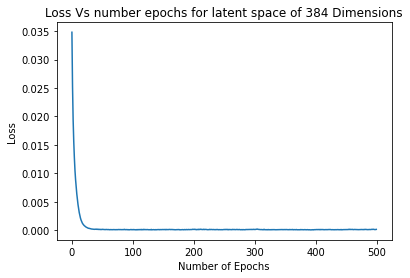

In [18]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot_220)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 384 Dimensions")
plt.show()

In [19]:
res.shape
dr = pd.DataFrame(res)
print(dr)
dr.to_csv('384.csv')

          0         1         2         3         4         5         6    \
0    0.043723  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.075856   
2    0.000000  0.000000  0.000000  0.000000  0.562848  0.227398  0.977232   
3    0.000000  0.620710  0.015127  0.313432  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.006820  0.743159  0.000000  0.000000  0.373046   
..        ...       ...       ...       ...       ...       ...       ...   
926  0.000000  0.205347  0.000000  0.000000  0.191108  0.357335  0.000000   
927  0.000000  0.000000  0.000000  0.000000  0.646334  0.639531  0.297859   
928  0.000000  0.000000  0.000000  0.000000  0.961703  1.272657  0.110852   
929  0.753032  0.000000  0.615047  0.055410  0.000000  0.118663  0.463131   
930  0.000000  0.000000  0.000000  0.083836  0.324445  0.000000  0.000000   

          7         8         9    ...       374       375       376  \
0  

# More larger Dimensions


In [ ]:
num_inputs = 512

hidden_1 = 512//2       ## 256
hidden_2 = hidden_1 //2  ## 128
hidden_3 = hidden_2 //2  ## 64
hidden_4 = hidden_2
hidden_5 = hidden_1

num_outputs = num_inputs ## 512

learning_rate = 0.001
activ_fn = tf.nn.relu
#norm = tf.nn.batch_normalization()

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

## Weights

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.transpose(w3)
w5 = tf.transpose(w2)
w6 = tf.transpose(w1)



## Biases

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))

b4 = b2
b5 = b1

b6 = tf.Variable(tf.zeros(num_outputs))


hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
output_layer = activ_fn(tf.matmul(hid_layer5,w6)+b6)

## Loss Function

loss = tf.reduce_mean(tf.square(output_layer - X))

## Optimzer
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

num_epochs = 500
batch_size = 8
to_plot = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
    
    saver.save(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')


Epoch: 0 Loss: 0.10121292620897293
Epoch: 20 Loss: 0.012367009185254574
Epoch: 40 Loss: 0.01190527155995369
Epoch: 60 Loss: 0.009825997985899448
Epoch: 80 Loss: 0.012089080177247524
Epoch: 100 Loss: 0.012143723666667938
Epoch: 120 Loss: 0.008897398598492146
Epoch: 140 Loss: 0.00812164694070816
Epoch: 160 Loss: 0.010212169960141182
Epoch: 180 Loss: 0.008470087312161922
Epoch: 200 Loss: 0.010004487819969654
Epoch: 220 Loss: 0.008345128037035465
Epoch: 240 Loss: 0.008415118791162968
Epoch: 260 Loss: 0.008509389124810696
Epoch: 280 Loss: 0.00817402359098196
Epoch: 300 Loss: 0.0077760168351233006
Epoch: 320 Loss: 0.007885734550654888
Epoch: 340 Loss: 0.008110381662845612
Epoch: 360 Loss: 0.006951645016670227
Epoch: 380 Loss: 0.007551573216915131
Epoch: 400 Loss: 0.0071871024556458
Epoch: 420 Loss: 0.007503820117563009
Epoch: 440 Loss: 0.009221826680004597
Epoch: 460 Loss: 0.007303739432245493
Epoch: 480 Loss: 0.007328186649829149


In [ ]:
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')
    d50 = hid_layer3.eval(feed_dict={X: df})  

np.savetxt('Dim_64.tsv',d50,delimiter='\t')

In [ ]:
d50

array([[0.60872406, 0.        , 0.        , ..., 0.01195174, 0.        ,
        0.        ],
       [0.        , 1.5955508 , 0.        , ..., 0.        , 0.        ,
        1.7521322 ],
       [0.        , 2.2621021 , 0.        , ..., 0.        , 0.        ,
        2.5632324 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.000032  ],
       [0.        , 0.        , 0.        , ..., 1.340622  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.56723374, 0.        ,
        0.0072813 ]], dtype=float32)

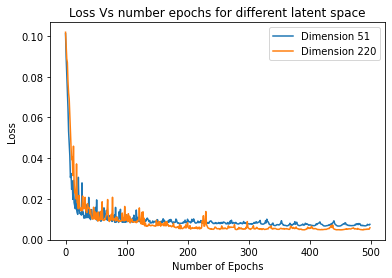

In [ ]:
Dim_51,= plt.plot(to_plot, label="Dimension 51")
Dim_220, =  plt.plot(to_plot_220, label="Dimension 220")
plt.legend(handles=[Dim_51, Dim_220])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for different latent space")
plt.show()
